# Обучение нейросети

In [3]:
pip install pillow

   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.0 MB 8.3 MB/s eta 0:00:01
   -------------- ------------------------- 2.6/7.0 MB 9.4 MB/s eta 0:00:01
   -------------------------------- ------- 5.8/7.0 MB 11.4 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 11.0 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.7 MB 9.6 MB/s eta 0:00:01
   -------------- ------------------------- 3.1/8.7 MB 8.8 MB/s eta 0:00:01
   --------------------------- ------------ 6.0/8.7 MB 10.9 MB/s eta 0:00:01
   -------------------------------------- - 8.4/8.7 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 10.8 MB/s  0:00:00
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   -- ------------------------------------- 2.4/38.6 MB 11.2 MB/s eta 0:00:04
   ---- ----------------------------------- 4.5/38.6 MB 11.2 MB/s eta 0:00:04
   ------ --------------------------------- 6.3/38.6 MB 10.4 MB/s eta 0:00:04
   -------- ------------------------------- 8.4/38.6 MB 10.6 MB/s eta 0:00:03
   ----------- ---------------------------- 10.7/38.6 MB 10.6 MB/s eta 0:00:03
   ------------- -------------------------- 12.8/38.6 MB 10.7 MB/s eta 0:00:03
   --------

In [124]:
import os, tensorflow as tf, numpy as np

from tensorflow import keras
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [125]:
SIZE_IMAGE = (256, 256)

In [126]:
# Функция для создания списка с путями фото

def create_list_paths(name_folder: str) -> list[str]:
    path = f'./images/{name_folder}'
    if os.path.exists(path):
        return [f'{path}/{image}' for image in os.listdir(path)]
    return []

In [127]:
# Функция для создания numpy массива из фото

def create_array_from_image(list_paths: list[str]) -> np.array:
    output_list = []
    for path in list_paths:
        if os.path.exists(path):
            image = Image.open(path).convert('L')
            image = ImageOps.fit(image, SIZE_IMAGE, Image.Resampling.LANCZOS)
            output_list.append(np.asarray(image))
            # output_list = np.append(output_list, np.asarray(Image.open(path).convert('L')))
    return output_list

In [128]:
dict_key = {
    'cat' : 0,
    'dog' : 1,
    'chicken' : 2,
    'cow' : 3,
    'chamomile' : 4,
    'rose' : 5,
    'lily' : 6,
    'tulip' : 7,
    'circle' : 8,
    'triangle' : 9,
    'rectangle' : 10,
    'square' : 11
}

In [129]:
X = []
y = []

In [130]:
for key in dict_key.keys():
    list_paths = create_list_paths(key)
    list_array = create_array_from_image(list_paths)
    X.extend(list_array)
    y.extend([dict_key[key] for _ in range(len(list_array))])

In [131]:
len(X)

12000

In [132]:
len(y)

12000

In [133]:
X = np.array(X, dtype=np.uint8)
y = np.array(y, dtype=np.uint8)

In [134]:
X.shape, y.shape

((12000, 256, 256), (12000,))

In [135]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [136]:
x_train.shape, x_test.shape

((8040, 256, 256), (3960, 256, 256))

In [137]:
y_train.shape, y_test.shape

((8040,), (3960,))

In [138]:
x_train = x_train / 255
x_test = x_test / 255

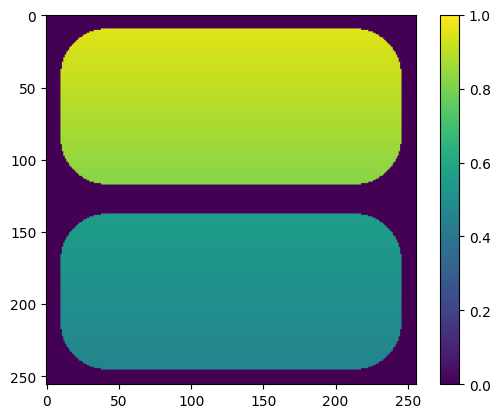

In [139]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

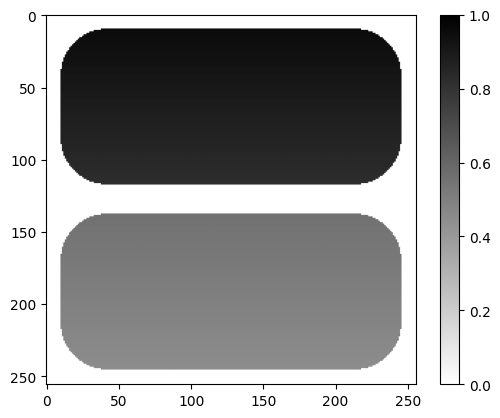

In [140]:
plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [171]:
model = keras.Sequential([keras.layers.Flatten(input_shape=SIZE_IMAGE),
                         keras.layers.Dense(64, activation='relu'),
                         keras.layers.Dense(64, activation='relu'),
                         keras.layers.Dense(64, activation='relu'),
                         keras.layers.Dense(12, activation='softmax')])

In [172]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'], steps_per_execution=1)

In [173]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_19 (Flatten)            │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │     4,194,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 12)             │           780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,203,468 (16.03 MB)

 Trainable params: 4,203,468 (16.03 MB)

 Non-trainable params: 0 (0.00 B)

In [174]:
model.fit(x_train, y_train, epochs=300)

Epoch 1/300
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1943 - loss: 2.3399
Epoch 2/300
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2818 - loss: 2.0956
Epoch 3/300
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3246 - loss: 1.9714
Epoch 4/300
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3514 - loss: 1.8890
Epoch 5/300
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3700 - loss: 1.8228
Epoch 6/300
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3944 - loss: 1.7642
Epoch 7/300
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4111 - loss: 1.7181
Epoch 8/300
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4240 - loss: 1.6715
Epoch 9/300
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4407 - loss: 1.6354
Epoch 10/300
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4561 - loss: 1.5935
Epoch 11/300
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4663 - loss: 1.5639
Epoch 12/300
252/252 ━━━━━━━━━━━━

In [175]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}\nTest loss: {test_loss}')

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4422 - loss: 2.8671
Test accuracy: 0.44217172265052795
Test loss: 2.8670780658721924


In [85]:
predictions = model.predict(x_train)

250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step


In [61]:
np.argmax(predictions[0])

np.int64(4)

In [62]:
y_train[0]

np.uint8(3)

In [63]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)